---
<style>
hr {
    border-width:2px;
    border-color:#75DFC1;
}
</style>
---

<center> <h1> Projet - Supply Chain </h1> </center>
<center> <h2> Étape : Scrape les données à partir du site : fr.trustpilot.com </h2></center>

---

# Informations explicatives

## Catégorie ciblée : Services aux entreprises
## Sous catégorie ciblée : Transport et logistique

Avec cette URL [https://fr.trustpilot.com/categories/business_services](https://fr.trustpilot.com/categories/business_services), on doit scraper les informations nécessaires.

Deux DataFrames vont être générés :

1. `df_Entreprise.csv` contient les informations suivantes pour chaque entreprise :
   - Nom de l'entreprise
   - Location/Lieu
   - Trust score
   - Nombre d'avis
   - Services proposés (liste)

2. `Df_avis.csv` : contient les informations suivantes pour chaque entreprise :
   - Nom de l'entreprise
   - Nom de l'utilisateur (s'il existe)
   - La date de l'avis
   - La note donnée
   - Commentaire_client
   - Réponse de l'entreprise


In [1]:
# importation des packages

import requests  # Importe la bibliothèque requests, utilisée pour envoyer des requêtes HTTP en Python.
from bs4 import BeautifulSoup as ps # Importe la classe BeautifulSoup de la bibliothèque bs4 et la renomme ps pour l'analyse du contenu HTML.


#Définition de l'URL cible
url_Cat_Transp_Logistique="https://fr.trustpilot.com/categories/business_services?subcategories=shipping_logistics"

Page_HtMl=requests.get(url_Cat_Transp_Logistique)

Soup=ps(Page_HtMl.content,'lxml')

#print(Soup.prettify().splitlines()[0:30]) # affichage 30 lignes



In [2]:
#Teste 3::: Scraper les donner sur deux pages 
#  listes pour stocker les informations
Entreprises = []
Locations = []
TrustScores = []
NombreAvis = []
ServicesProposes = []

# pages à parcourir
nombre_de_pages = 2 

# parcourur le nombre de pages
for page in range(1, nombre_de_pages + 1):
    # Construction de l'URL ppour chaque page
    url = f"https://fr.trustpilot.com/categories/business_services?page={page}&subcategories=shipping_logistics"
    
    # Requête HTTP pour récupere la page htme
    response = requests.get(url)
    # beautifulesoup pour parcer avec le parceaus lxml
    
    soup = ps(response.content, 'lxml')
    
    # iodentifier les information et les extraire de la page courante
    info_entreprises = soup.find_all('div', class_="paper_paper__1PY90 paper_outline__lwsUX card_card__lQWDv card_noPadding__D8PcU styles_wrapper__2JOo2")
    
    for entreprise in info_entreprises:
        # pour chque information , on l extraire de ca baliser et les sotcker dans la table correspondants
        # Nom_entrprise
        nom = entreprise.find('p', class_='styles_displayName__GOhL2').text if entreprise.find('p', class_='styles_displayName__GOhL2') else 'Non'
        Entreprises.append(nom)
        # Score_entrprise
        score = entreprise.find('span', class_='styles_trustScore__8emxJ')
        TrustScores.append(score.text.replace('TrustScore', '').strip() if score else 'Non')
        # Nb avise_entrprise
        avis_text = entreprise.find('p', class_='styles_ratingText__yQ5S7').text
        parts = avis_text.split('|')
        NombreAvis.append(''.join(filter(str.isdigit, parts[1])) if len(parts) > 1 else 'Non ')
        # lieu_entrprise
        loc = entreprise.find('span', class_='styles_location__ILZb0')
        Locations.append(loc.text if loc else 'Non ')
        # services proposé_entrprise
        services_elems = entreprise.find_all('span', class_='typography_body-s__aY15Q')
        ServicesProposes.append([service.text for service in services_elems] if services_elems else ['Non '])

# Création du dictionnaire <<>>> stocker toutes les informations extraite pour construire apres un data frame
Dictionnaire_ = {
    'Entreprise': Entreprises,
    'Location': Locations,
    'TrustScore': TrustScores,
    'NombreAvis': NombreAvis,
    'ServicesProposes': ServicesProposes
}

# vérification
#print(Dictionnaire_)


In [3]:
import pandas as pd


df_Intreprise=pd.DataFrame(Dictionnaire_)
display(df_Intreprise.head())
display(df_Intreprise.info())


# stocker dans ficher csv
df_Intreprise.to_csv('df_Intreprise.csv', index=False)

,Entreprise,Location,TrustScore,NombreAvis,ServicesProposes
0,Nextories (ex i-Demenager),"PARIS, France","4,9",3725,"[Services de déménagement et de stockage, Démé..."
1,La Tournée,"Paris, France","4,9",489,"[Boutique de boissons non alcoolisées, Distrib..."
2,CartonsDeDemenagement.com,"LIMONEST, France","4,8",11398,"[Magasin d'articles d'emballage, Magasin d'art..."
3,LOCABOX,"Lormont, France","4,8",7524,"[Centre de stockage, Entrepôt, Centre de stock..."
4,La Tribu du Carton,"Vénissieux, France","4,8",5182,"[Magasin d'articles d'emballage, Magasin d'art..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Entreprise        40 non-null     object
 1   Location          40 non-null     object
 2   TrustScore        40 non-null     object
 3   NombreAvis        40 non-null     object
 4   ServicesProposes  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


None

In [4]:
import re
import time
# Liste des bases d'URL pour chaque entreprise
entreprises_urls = [
    "https://fr.trustpilot.com/review/nextories.com",
    "https://fr.trustpilot.com/review/www.la-tournee.co", 
    "https://fr.trustpilot.com/review/www.cartonsdedemenagement.com",
    "https://fr.trustpilot.com/review/locabox.fr",
    "https://fr.trustpilot.com/review/www.latribuducarton.fr",
    "https://fr.trustpilot.com/review/merci-facteur.com",
    "https://fr.trustpilot.com/review/youstock.com",
    "https://fr.trustpilot.com/review/lockall.fr",
    "https://fr.trustpilot.com/review/papernest.com",
    "https://fr.trustpilot.com/review/welkit.fr",
    "https://fr.trustpilot.com/review/www.cocolis.fr",
    "https://fr.trustpilot.com/review/www.ecocarton.fr",
    "https://fr.trustpilot.com/review/zolemba.fr",
    "https://fr.trustpilot.com/review/delight-cbd.com",
    "https://fr.trustpilot.com/review/cartonmarket.fr",
    "https://fr.trustpilot.com/review/www.paysdesenveloppes.fr",
    "https://fr.trustpilot.com/review/demeclic.fr",
    "https://fr.trustpilot.com/review/coliback.com",
    "https://fr.trustpilot.com/review/ubbabio.com",
    "https://fr.trustpilot.com/review/www.expe-domtom.fr",
    "https://fr.trustpilot.com/review/weed-side-story.com",
    "https://fr.trustpilot.com/review/happy-post.com",
    "https://fr.trustpilot.com/review/www.packhelp.fr",
    "https://fr.trustpilot.com/review/colicoli.fr",
    "https://fr.trustpilot.com/review/www.thepackengers.com",
    "https://fr.trustpilot.com/review/www.shopiles.fr",
    "https://fr.trustpilot.com/review/www.colisexpat.com",
    "https://fr.trustpilot.com/review/www.fretbay.com",
    "https://fr.trustpilot.com/review/upela.com",
    "https://fr.trustpilot.com/review/limitedresell.com",
    "https://fr.trustpilot.com/review/parcelmonkey.fr",
    "https://fr.trustpilot.com/review/demenageurs-bretons.fr",
    "https://fr.trustpilot.com/review/lettre24.com",
    "https://fr.trustpilot.com/review/www.officiel-demenagement.com",
    "https://fr.trustpilot.com/review/pakup-emballage.fr",
    "https://fr.trustpilot.com/review/stls.fr",
    "https://fr.trustpilot.com/review/green-kartel.com",
    "https://fr.trustpilot.com/review/utopya.fr",
    "https://fr.trustpilot.com/review/www.airselli.com"
   ]

def extraire_nom_entreprise(url):
    # L'expression régulière capture  le nom de l'entreprise.
    match = re.search(r"review/(?:www\.)?([\w-]+)\.(com|co|fr)", url)
    if match:
        return match.group(1)  # Retourne la partie du nom de l'entreprise
    return "xxxx"



nombre_de_pages = 20 # Nombre de pages à parcourir pour chaque entreprise

#  stocker les avis par entreprise
Nom_Entreprise=[]
Nom = []
Nombre_avis = []
Pays = []
Note = []
Date = []
Titre_avis = []
Contenu_avis = []
Réponse_Entrpris = []




for base_url in entreprises_urls:
    Entreprise=extraire_nom_entreprise(base_url)
    print(Entreprise)
   #Pour eviter la détection un volume anormalement élevé de requêtes provenant de mon adresse IP 
    time.sleep(10)  # Pause de 10 secondes ::pour simuler un comportement plus humain et moins intensif
    
    for page in range(1, nombre_de_pages + 1):
        # Construction de l'URL pour chaque page
        url = f"{base_url}?page={page}"
        display(url)
        # au cas où il y a la réponse de requests n eqaule 200// des erreurs à eviter 
        try:  
            time.sleep(10)  # Pause de 10 secondes :Pour eviter la détection un volume anormalement élevé de requêtes provenant de mon adresse IP 
            response = requests.get(url)
            if response.status_code == 200:
                # Récupération du contenu de la page
                Soup = ps(response.content, 'lxml')

                # Recherche des avis clients sur la page
                Avis_Clients = Soup.find_all('article', class_='paper_paper__1PY90 paper_outline__lwsUX card_card__lQWDv card_noPadding__D8PcU styles_reviewCard__hcAvl')

                for avis in Avis_Clients:

                    # Extraction et ajout des données pour chaque avis
                    nom = avis.find('span', {'data-consumer-name-typography': True}).text.strip() if avis.find('span', {'data-consumer-name-typography': True}) else 'Non'
                    nombre_avis = avis.find('span', {'data-consumer-reviews-count-typography': True}).text.split(' ')[0] if avis.find('span', {'data-consumer-reviews-count-typography': True}) else '0'

                    svg = avis.find('svg')
                    if svg and svg.find_next_sibling('span'):
                        pays = svg.find_next_sibling('span').text.strip()
                    else:
                        pays = 'Non'

                    note_img = avis.find('div', class_='star-rating_starRating__4rrcf')
                    if note_img and note_img.find('img', alt=True):
                        note_alt_text = note_img.find('img', alt=True)['alt']
                        note = note_alt_text.replace('Noté ', '').replace(' sur 5 étoiles', '')
                    else:
                        note = 'Non'

                    date = avis.find('time')['datetime']
                    titre_avis = avis.find('h2').text.strip() if avis.find('h2') else 'Non'
                    contenu_avis = avis.find('p', {'data-service-review-text-typography': True}).text.strip() if avis.find('p', {'data-service-review-text-typography': True}) else 'Non'

                    reponse_entreprise_element = avis.find('p', class_='styles_message__shHhX')
                    reponse_entreprise = reponse_entreprise_element.text.strip() if reponse_entreprise_element else 'Non'



                    Nom_Entreprise.append(Entreprise)
                    Nom.append(nom)
                    Nombre_avis.append(nombre_avis)
                    Pays.append(pays)
                    Note.append(note)
                    Date.append(date)
                    Titre_avis.append(titre_avis)
                    Contenu_avis.append(contenu_avis)
                    Réponse_Entrpris.append(reponse_entreprise)
                    
            else:
                print(f"Erreur lors de la requête : {response.status_code}")
        except Exception as e:
            print(f"Erreur lors de la récupération des données pour {url}: {e}")


    
# Création d'un DataFrame 
df = pd.DataFrame({
"Nom_Entreprise": Nom_Entreprise,  
"Nom_Client": Nom,
"Nombre_avis": Nombre_avis,
"Pays": Pays,
"Note": Note,
"Date": Date,
"Titre_avis": Titre_avis,
"Contenu_avis": Contenu_avis,
"Réponse_Entrpris": Réponse_Entrpris
})


display(df.head())
display(df.tail())
display(df.info())    

 
    



nextories


'https://fr.trustpilot.com/review/nextories.com?page=1'

'https://fr.trustpilot.com/review/nextories.com?page=2'

'https://fr.trustpilot.com/review/nextories.com?page=3'

'https://fr.trustpilot.com/review/nextories.com?page=4'

'https://fr.trustpilot.com/review/nextories.com?page=5'

'https://fr.trustpilot.com/review/nextories.com?page=6'

'https://fr.trustpilot.com/review/nextories.com?page=7'

'https://fr.trustpilot.com/review/nextories.com?page=8'

'https://fr.trustpilot.com/review/nextories.com?page=9'

'https://fr.trustpilot.com/review/nextories.com?page=10'

'https://fr.trustpilot.com/review/nextories.com?page=11'

'https://fr.trustpilot.com/review/nextories.com?page=12'

'https://fr.trustpilot.com/review/nextories.com?page=13'

'https://fr.trustpilot.com/review/nextories.com?page=14'

'https://fr.trustpilot.com/review/nextories.com?page=15'

'https://fr.trustpilot.com/review/nextories.com?page=16'

'https://fr.trustpilot.com/review/nextories.com?page=17'

'https://fr.trustpilot.com/review/nextories.com?page=18'

'https://fr.trustpilot.com/review/nextories.com?page=19'

'https://fr.trustpilot.com/review/nextories.com?page=20'

la-tournee


'https://fr.trustpilot.com/review/www.la-tournee.co?page=1'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=2'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=3'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=4'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=5'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=6'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=7'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=8'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=9'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=10'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=11'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=12'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=13'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=14'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=15'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=16'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=17'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=18'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=19'

'https://fr.trustpilot.com/review/www.la-tournee.co?page=20'

cartonsdedemenagement


'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=1'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=2'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=3'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=4'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=5'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=6'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=7'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=8'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=9'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=10'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=11'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=12'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=13'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=14'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=15'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=16'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=17'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=18'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=19'

'https://fr.trustpilot.com/review/www.cartonsdedemenagement.com?page=20'

locabox


'https://fr.trustpilot.com/review/locabox.fr?page=1'

'https://fr.trustpilot.com/review/locabox.fr?page=2'

'https://fr.trustpilot.com/review/locabox.fr?page=3'

'https://fr.trustpilot.com/review/locabox.fr?page=4'

'https://fr.trustpilot.com/review/locabox.fr?page=5'

'https://fr.trustpilot.com/review/locabox.fr?page=6'

'https://fr.trustpilot.com/review/locabox.fr?page=7'

'https://fr.trustpilot.com/review/locabox.fr?page=8'

'https://fr.trustpilot.com/review/locabox.fr?page=9'

'https://fr.trustpilot.com/review/locabox.fr?page=10'

'https://fr.trustpilot.com/review/locabox.fr?page=11'

'https://fr.trustpilot.com/review/locabox.fr?page=12'

'https://fr.trustpilot.com/review/locabox.fr?page=13'

'https://fr.trustpilot.com/review/locabox.fr?page=14'

'https://fr.trustpilot.com/review/locabox.fr?page=15'

'https://fr.trustpilot.com/review/locabox.fr?page=16'

'https://fr.trustpilot.com/review/locabox.fr?page=17'

'https://fr.trustpilot.com/review/locabox.fr?page=18'

'https://fr.trustpilot.com/review/locabox.fr?page=19'

'https://fr.trustpilot.com/review/locabox.fr?page=20'

latribuducarton


'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=1'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=2'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=3'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=4'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=5'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=6'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=7'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=8'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=9'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=10'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=11'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=12'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=13'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=14'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=15'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=16'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=17'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=18'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=19'

'https://fr.trustpilot.com/review/www.latribuducarton.fr?page=20'

merci-facteur


'https://fr.trustpilot.com/review/merci-facteur.com?page=1'

'https://fr.trustpilot.com/review/merci-facteur.com?page=2'

'https://fr.trustpilot.com/review/merci-facteur.com?page=3'

'https://fr.trustpilot.com/review/merci-facteur.com?page=4'

'https://fr.trustpilot.com/review/merci-facteur.com?page=5'

'https://fr.trustpilot.com/review/merci-facteur.com?page=6'

'https://fr.trustpilot.com/review/merci-facteur.com?page=7'

'https://fr.trustpilot.com/review/merci-facteur.com?page=8'

'https://fr.trustpilot.com/review/merci-facteur.com?page=9'

'https://fr.trustpilot.com/review/merci-facteur.com?page=10'

'https://fr.trustpilot.com/review/merci-facteur.com?page=11'

'https://fr.trustpilot.com/review/merci-facteur.com?page=12'

'https://fr.trustpilot.com/review/merci-facteur.com?page=13'

'https://fr.trustpilot.com/review/merci-facteur.com?page=14'

'https://fr.trustpilot.com/review/merci-facteur.com?page=15'

'https://fr.trustpilot.com/review/merci-facteur.com?page=16'

'https://fr.trustpilot.com/review/merci-facteur.com?page=17'

'https://fr.trustpilot.com/review/merci-facteur.com?page=18'

'https://fr.trustpilot.com/review/merci-facteur.com?page=19'

'https://fr.trustpilot.com/review/merci-facteur.com?page=20'

youstock


'https://fr.trustpilot.com/review/youstock.com?page=1'

'https://fr.trustpilot.com/review/youstock.com?page=2'

'https://fr.trustpilot.com/review/youstock.com?page=3'

'https://fr.trustpilot.com/review/youstock.com?page=4'

'https://fr.trustpilot.com/review/youstock.com?page=5'

'https://fr.trustpilot.com/review/youstock.com?page=6'

'https://fr.trustpilot.com/review/youstock.com?page=7'

'https://fr.trustpilot.com/review/youstock.com?page=8'

'https://fr.trustpilot.com/review/youstock.com?page=9'

'https://fr.trustpilot.com/review/youstock.com?page=10'

'https://fr.trustpilot.com/review/youstock.com?page=11'

'https://fr.trustpilot.com/review/youstock.com?page=12'

'https://fr.trustpilot.com/review/youstock.com?page=13'

'https://fr.trustpilot.com/review/youstock.com?page=14'

'https://fr.trustpilot.com/review/youstock.com?page=15'

'https://fr.trustpilot.com/review/youstock.com?page=16'

'https://fr.trustpilot.com/review/youstock.com?page=17'

'https://fr.trustpilot.com/review/youstock.com?page=18'

'https://fr.trustpilot.com/review/youstock.com?page=19'

'https://fr.trustpilot.com/review/youstock.com?page=20'

lockall


'https://fr.trustpilot.com/review/lockall.fr?page=1'

'https://fr.trustpilot.com/review/lockall.fr?page=2'

'https://fr.trustpilot.com/review/lockall.fr?page=3'

'https://fr.trustpilot.com/review/lockall.fr?page=4'

'https://fr.trustpilot.com/review/lockall.fr?page=5'

'https://fr.trustpilot.com/review/lockall.fr?page=6'

'https://fr.trustpilot.com/review/lockall.fr?page=7'

'https://fr.trustpilot.com/review/lockall.fr?page=8'

'https://fr.trustpilot.com/review/lockall.fr?page=9'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=10'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=11'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=12'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=13'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=14'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=15'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=16'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=17'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lockall.fr?page=20'

Erreur lors de la requête : 404
papernest


'https://fr.trustpilot.com/review/papernest.com?page=1'

'https://fr.trustpilot.com/review/papernest.com?page=2'

'https://fr.trustpilot.com/review/papernest.com?page=3'

'https://fr.trustpilot.com/review/papernest.com?page=4'

'https://fr.trustpilot.com/review/papernest.com?page=5'

'https://fr.trustpilot.com/review/papernest.com?page=6'

'https://fr.trustpilot.com/review/papernest.com?page=7'

'https://fr.trustpilot.com/review/papernest.com?page=8'

'https://fr.trustpilot.com/review/papernest.com?page=9'

'https://fr.trustpilot.com/review/papernest.com?page=10'

'https://fr.trustpilot.com/review/papernest.com?page=11'

'https://fr.trustpilot.com/review/papernest.com?page=12'

'https://fr.trustpilot.com/review/papernest.com?page=13'

'https://fr.trustpilot.com/review/papernest.com?page=14'

'https://fr.trustpilot.com/review/papernest.com?page=15'

'https://fr.trustpilot.com/review/papernest.com?page=16'

'https://fr.trustpilot.com/review/papernest.com?page=17'

'https://fr.trustpilot.com/review/papernest.com?page=18'

'https://fr.trustpilot.com/review/papernest.com?page=19'

'https://fr.trustpilot.com/review/papernest.com?page=20'

welkit


'https://fr.trustpilot.com/review/welkit.fr?page=1'

'https://fr.trustpilot.com/review/welkit.fr?page=2'

'https://fr.trustpilot.com/review/welkit.fr?page=3'

'https://fr.trustpilot.com/review/welkit.fr?page=4'

'https://fr.trustpilot.com/review/welkit.fr?page=5'

'https://fr.trustpilot.com/review/welkit.fr?page=6'

'https://fr.trustpilot.com/review/welkit.fr?page=7'

'https://fr.trustpilot.com/review/welkit.fr?page=8'

'https://fr.trustpilot.com/review/welkit.fr?page=9'

'https://fr.trustpilot.com/review/welkit.fr?page=10'

'https://fr.trustpilot.com/review/welkit.fr?page=11'

'https://fr.trustpilot.com/review/welkit.fr?page=12'

'https://fr.trustpilot.com/review/welkit.fr?page=13'

'https://fr.trustpilot.com/review/welkit.fr?page=14'

'https://fr.trustpilot.com/review/welkit.fr?page=15'

'https://fr.trustpilot.com/review/welkit.fr?page=16'

'https://fr.trustpilot.com/review/welkit.fr?page=17'

'https://fr.trustpilot.com/review/welkit.fr?page=18'

'https://fr.trustpilot.com/review/welkit.fr?page=19'

'https://fr.trustpilot.com/review/welkit.fr?page=20'

cocolis


'https://fr.trustpilot.com/review/www.cocolis.fr?page=1'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=2'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=3'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=4'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=5'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=6'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=7'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=8'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=9'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=10'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=11'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=12'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=13'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=14'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=15'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=16'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=17'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=18'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=19'

'https://fr.trustpilot.com/review/www.cocolis.fr?page=20'

ecocarton


'https://fr.trustpilot.com/review/www.ecocarton.fr?page=1'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=2'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=3'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=4'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=5'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=6'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=7'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=8'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=9'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=10'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=11'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=12'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=13'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=14'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=15'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=16'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=17'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=18'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=19'

'https://fr.trustpilot.com/review/www.ecocarton.fr?page=20'

zolemba


'https://fr.trustpilot.com/review/zolemba.fr?page=1'

'https://fr.trustpilot.com/review/zolemba.fr?page=2'

'https://fr.trustpilot.com/review/zolemba.fr?page=3'

'https://fr.trustpilot.com/review/zolemba.fr?page=4'

'https://fr.trustpilot.com/review/zolemba.fr?page=5'

'https://fr.trustpilot.com/review/zolemba.fr?page=6'

'https://fr.trustpilot.com/review/zolemba.fr?page=7'

'https://fr.trustpilot.com/review/zolemba.fr?page=8'

'https://fr.trustpilot.com/review/zolemba.fr?page=9'

'https://fr.trustpilot.com/review/zolemba.fr?page=10'

'https://fr.trustpilot.com/review/zolemba.fr?page=11'

'https://fr.trustpilot.com/review/zolemba.fr?page=12'

'https://fr.trustpilot.com/review/zolemba.fr?page=13'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/zolemba.fr?page=14'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/zolemba.fr?page=15'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/zolemba.fr?page=16'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/zolemba.fr?page=17'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/zolemba.fr?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/zolemba.fr?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/zolemba.fr?page=20'

Erreur lors de la requête : 404
delight-cbd


'https://fr.trustpilot.com/review/delight-cbd.com?page=1'

'https://fr.trustpilot.com/review/delight-cbd.com?page=2'

'https://fr.trustpilot.com/review/delight-cbd.com?page=3'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=4'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=5'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=6'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=7'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=8'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=9'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=10'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=11'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=12'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=13'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=14'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=15'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=16'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=17'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/delight-cbd.com?page=20'

Erreur lors de la requête : 404
cartonmarket


'https://fr.trustpilot.com/review/cartonmarket.fr?page=1'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=2'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=3'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=4'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=5'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=6'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=7'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=8'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=9'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=10'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=11'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=12'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=13'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=14'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=15'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=16'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=17'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=18'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=19'

'https://fr.trustpilot.com/review/cartonmarket.fr?page=20'

paysdesenveloppes


'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=1'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=2'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=3'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=4'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=5'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=6'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=7'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=8'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=9'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=10'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=11'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=12'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=13'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=14'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=15'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=16'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=17'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=18'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=19'

'https://fr.trustpilot.com/review/www.paysdesenveloppes.fr?page=20'

demeclic


'https://fr.trustpilot.com/review/demeclic.fr?page=1'

'https://fr.trustpilot.com/review/demeclic.fr?page=2'

'https://fr.trustpilot.com/review/demeclic.fr?page=3'

'https://fr.trustpilot.com/review/demeclic.fr?page=4'

'https://fr.trustpilot.com/review/demeclic.fr?page=5'

'https://fr.trustpilot.com/review/demeclic.fr?page=6'

'https://fr.trustpilot.com/review/demeclic.fr?page=7'

'https://fr.trustpilot.com/review/demeclic.fr?page=8'

'https://fr.trustpilot.com/review/demeclic.fr?page=9'

'https://fr.trustpilot.com/review/demeclic.fr?page=10'

'https://fr.trustpilot.com/review/demeclic.fr?page=11'

'https://fr.trustpilot.com/review/demeclic.fr?page=12'

'https://fr.trustpilot.com/review/demeclic.fr?page=13'

'https://fr.trustpilot.com/review/demeclic.fr?page=14'

'https://fr.trustpilot.com/review/demeclic.fr?page=15'

'https://fr.trustpilot.com/review/demeclic.fr?page=16'

'https://fr.trustpilot.com/review/demeclic.fr?page=17'

'https://fr.trustpilot.com/review/demeclic.fr?page=18'

'https://fr.trustpilot.com/review/demeclic.fr?page=19'

'https://fr.trustpilot.com/review/demeclic.fr?page=20'

coliback


'https://fr.trustpilot.com/review/coliback.com?page=1'

'https://fr.trustpilot.com/review/coliback.com?page=2'

'https://fr.trustpilot.com/review/coliback.com?page=3'

'https://fr.trustpilot.com/review/coliback.com?page=4'

'https://fr.trustpilot.com/review/coliback.com?page=5'

'https://fr.trustpilot.com/review/coliback.com?page=6'

'https://fr.trustpilot.com/review/coliback.com?page=7'

'https://fr.trustpilot.com/review/coliback.com?page=8'

'https://fr.trustpilot.com/review/coliback.com?page=9'

'https://fr.trustpilot.com/review/coliback.com?page=10'

'https://fr.trustpilot.com/review/coliback.com?page=11'

'https://fr.trustpilot.com/review/coliback.com?page=12'

'https://fr.trustpilot.com/review/coliback.com?page=13'

'https://fr.trustpilot.com/review/coliback.com?page=14'

'https://fr.trustpilot.com/review/coliback.com?page=15'

'https://fr.trustpilot.com/review/coliback.com?page=16'

'https://fr.trustpilot.com/review/coliback.com?page=17'

'https://fr.trustpilot.com/review/coliback.com?page=18'

'https://fr.trustpilot.com/review/coliback.com?page=19'

'https://fr.trustpilot.com/review/coliback.com?page=20'

ubbabio


'https://fr.trustpilot.com/review/ubbabio.com?page=1'

'https://fr.trustpilot.com/review/ubbabio.com?page=2'

'https://fr.trustpilot.com/review/ubbabio.com?page=3'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=4'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=5'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=6'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=7'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=8'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=9'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=10'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=11'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=12'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=13'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=14'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=15'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=16'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=17'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/ubbabio.com?page=20'

Erreur lors de la requête : 404
expe-domtom


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=1'

'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=2'

'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=3'

'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=4'

'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=5'

'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=6'

'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=7'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=8'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=9'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=10'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=11'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=12'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=13'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=14'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=15'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=16'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=17'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/www.expe-domtom.fr?page=20'

Erreur lors de la requête : 404
weed-side-story


'https://fr.trustpilot.com/review/weed-side-story.com?page=1'

'https://fr.trustpilot.com/review/weed-side-story.com?page=2'

'https://fr.trustpilot.com/review/weed-side-story.com?page=3'

'https://fr.trustpilot.com/review/weed-side-story.com?page=4'

'https://fr.trustpilot.com/review/weed-side-story.com?page=5'

'https://fr.trustpilot.com/review/weed-side-story.com?page=6'

'https://fr.trustpilot.com/review/weed-side-story.com?page=7'

'https://fr.trustpilot.com/review/weed-side-story.com?page=8'

'https://fr.trustpilot.com/review/weed-side-story.com?page=9'

'https://fr.trustpilot.com/review/weed-side-story.com?page=10'

'https://fr.trustpilot.com/review/weed-side-story.com?page=11'

'https://fr.trustpilot.com/review/weed-side-story.com?page=12'

'https://fr.trustpilot.com/review/weed-side-story.com?page=13'

'https://fr.trustpilot.com/review/weed-side-story.com?page=14'

'https://fr.trustpilot.com/review/weed-side-story.com?page=15'

'https://fr.trustpilot.com/review/weed-side-story.com?page=16'

'https://fr.trustpilot.com/review/weed-side-story.com?page=17'

'https://fr.trustpilot.com/review/weed-side-story.com?page=18'

'https://fr.trustpilot.com/review/weed-side-story.com?page=19'

'https://fr.trustpilot.com/review/weed-side-story.com?page=20'

happy-post


'https://fr.trustpilot.com/review/happy-post.com?page=1'

'https://fr.trustpilot.com/review/happy-post.com?page=2'

'https://fr.trustpilot.com/review/happy-post.com?page=3'

'https://fr.trustpilot.com/review/happy-post.com?page=4'

'https://fr.trustpilot.com/review/happy-post.com?page=5'

'https://fr.trustpilot.com/review/happy-post.com?page=6'

'https://fr.trustpilot.com/review/happy-post.com?page=7'

'https://fr.trustpilot.com/review/happy-post.com?page=8'

'https://fr.trustpilot.com/review/happy-post.com?page=9'

'https://fr.trustpilot.com/review/happy-post.com?page=10'

'https://fr.trustpilot.com/review/happy-post.com?page=11'

'https://fr.trustpilot.com/review/happy-post.com?page=12'

'https://fr.trustpilot.com/review/happy-post.com?page=13'

'https://fr.trustpilot.com/review/happy-post.com?page=14'

'https://fr.trustpilot.com/review/happy-post.com?page=15'

'https://fr.trustpilot.com/review/happy-post.com?page=16'

'https://fr.trustpilot.com/review/happy-post.com?page=17'

'https://fr.trustpilot.com/review/happy-post.com?page=18'

'https://fr.trustpilot.com/review/happy-post.com?page=19'

'https://fr.trustpilot.com/review/happy-post.com?page=20'

packhelp


'https://fr.trustpilot.com/review/www.packhelp.fr?page=1'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=2'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=3'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=4'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=5'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=6'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=7'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=8'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=9'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=10'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=11'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=12'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=13'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=14'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=15'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=16'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=17'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=18'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=19'

'https://fr.trustpilot.com/review/www.packhelp.fr?page=20'

colicoli


'https://fr.trustpilot.com/review/colicoli.fr?page=1'

'https://fr.trustpilot.com/review/colicoli.fr?page=2'

'https://fr.trustpilot.com/review/colicoli.fr?page=3'

'https://fr.trustpilot.com/review/colicoli.fr?page=4'

'https://fr.trustpilot.com/review/colicoli.fr?page=5'

'https://fr.trustpilot.com/review/colicoli.fr?page=6'

'https://fr.trustpilot.com/review/colicoli.fr?page=7'

'https://fr.trustpilot.com/review/colicoli.fr?page=8'

'https://fr.trustpilot.com/review/colicoli.fr?page=9'

'https://fr.trustpilot.com/review/colicoli.fr?page=10'

'https://fr.trustpilot.com/review/colicoli.fr?page=11'

'https://fr.trustpilot.com/review/colicoli.fr?page=12'

'https://fr.trustpilot.com/review/colicoli.fr?page=13'

'https://fr.trustpilot.com/review/colicoli.fr?page=14'

'https://fr.trustpilot.com/review/colicoli.fr?page=15'

'https://fr.trustpilot.com/review/colicoli.fr?page=16'

'https://fr.trustpilot.com/review/colicoli.fr?page=17'

'https://fr.trustpilot.com/review/colicoli.fr?page=18'

'https://fr.trustpilot.com/review/colicoli.fr?page=19'

'https://fr.trustpilot.com/review/colicoli.fr?page=20'

thepackengers


'https://fr.trustpilot.com/review/www.thepackengers.com?page=1'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=2'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=3'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=4'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=5'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=6'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=7'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=8'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=9'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=10'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=11'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=12'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=13'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=14'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=15'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=16'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=17'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=18'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=19'

'https://fr.trustpilot.com/review/www.thepackengers.com?page=20'

shopiles


'https://fr.trustpilot.com/review/www.shopiles.fr?page=1'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=2'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=3'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=4'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=5'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=6'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=7'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=8'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=9'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=10'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=11'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=12'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=13'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=14'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=15'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=16'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=17'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=18'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=19'

'https://fr.trustpilot.com/review/www.shopiles.fr?page=20'

colisexpat


'https://fr.trustpilot.com/review/www.colisexpat.com?page=1'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=2'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=3'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=4'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=5'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=6'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=7'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=8'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=9'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=10'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=11'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=12'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=13'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=14'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=15'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=16'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=17'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=18'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=19'

'https://fr.trustpilot.com/review/www.colisexpat.com?page=20'

fretbay


'https://fr.trustpilot.com/review/www.fretbay.com?page=1'

'https://fr.trustpilot.com/review/www.fretbay.com?page=2'

'https://fr.trustpilot.com/review/www.fretbay.com?page=3'

'https://fr.trustpilot.com/review/www.fretbay.com?page=4'

'https://fr.trustpilot.com/review/www.fretbay.com?page=5'

'https://fr.trustpilot.com/review/www.fretbay.com?page=6'

'https://fr.trustpilot.com/review/www.fretbay.com?page=7'

'https://fr.trustpilot.com/review/www.fretbay.com?page=8'

'https://fr.trustpilot.com/review/www.fretbay.com?page=9'

'https://fr.trustpilot.com/review/www.fretbay.com?page=10'

'https://fr.trustpilot.com/review/www.fretbay.com?page=11'

'https://fr.trustpilot.com/review/www.fretbay.com?page=12'

'https://fr.trustpilot.com/review/www.fretbay.com?page=13'

'https://fr.trustpilot.com/review/www.fretbay.com?page=14'

'https://fr.trustpilot.com/review/www.fretbay.com?page=15'

'https://fr.trustpilot.com/review/www.fretbay.com?page=16'

'https://fr.trustpilot.com/review/www.fretbay.com?page=17'

'https://fr.trustpilot.com/review/www.fretbay.com?page=18'

'https://fr.trustpilot.com/review/www.fretbay.com?page=19'

'https://fr.trustpilot.com/review/www.fretbay.com?page=20'

upela


'https://fr.trustpilot.com/review/upela.com?page=1'

'https://fr.trustpilot.com/review/upela.com?page=2'

'https://fr.trustpilot.com/review/upela.com?page=3'

'https://fr.trustpilot.com/review/upela.com?page=4'

'https://fr.trustpilot.com/review/upela.com?page=5'

'https://fr.trustpilot.com/review/upela.com?page=6'

'https://fr.trustpilot.com/review/upela.com?page=7'

'https://fr.trustpilot.com/review/upela.com?page=8'

'https://fr.trustpilot.com/review/upela.com?page=9'

'https://fr.trustpilot.com/review/upela.com?page=10'

'https://fr.trustpilot.com/review/upela.com?page=11'

'https://fr.trustpilot.com/review/upela.com?page=12'

'https://fr.trustpilot.com/review/upela.com?page=13'

'https://fr.trustpilot.com/review/upela.com?page=14'

'https://fr.trustpilot.com/review/upela.com?page=15'

'https://fr.trustpilot.com/review/upela.com?page=16'

'https://fr.trustpilot.com/review/upela.com?page=17'

'https://fr.trustpilot.com/review/upela.com?page=18'

'https://fr.trustpilot.com/review/upela.com?page=19'

'https://fr.trustpilot.com/review/upela.com?page=20'

limitedresell


'https://fr.trustpilot.com/review/limitedresell.com?page=1'

'https://fr.trustpilot.com/review/limitedresell.com?page=2'

'https://fr.trustpilot.com/review/limitedresell.com?page=3'

'https://fr.trustpilot.com/review/limitedresell.com?page=4'

'https://fr.trustpilot.com/review/limitedresell.com?page=5'

'https://fr.trustpilot.com/review/limitedresell.com?page=6'

'https://fr.trustpilot.com/review/limitedresell.com?page=7'

'https://fr.trustpilot.com/review/limitedresell.com?page=8'

'https://fr.trustpilot.com/review/limitedresell.com?page=9'

'https://fr.trustpilot.com/review/limitedresell.com?page=10'

'https://fr.trustpilot.com/review/limitedresell.com?page=11'

'https://fr.trustpilot.com/review/limitedresell.com?page=12'

'https://fr.trustpilot.com/review/limitedresell.com?page=13'

'https://fr.trustpilot.com/review/limitedresell.com?page=14'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/limitedresell.com?page=15'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/limitedresell.com?page=16'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/limitedresell.com?page=17'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/limitedresell.com?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/limitedresell.com?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/limitedresell.com?page=20'

Erreur lors de la requête : 404
parcelmonkey


'https://fr.trustpilot.com/review/parcelmonkey.fr?page=1'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=2'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=3'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=4'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=5'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=6'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=7'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=8'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=9'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=10'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=11'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=12'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=13'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=14'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=15'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=16'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=17'

'https://fr.trustpilot.com/review/parcelmonkey.fr?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/parcelmonkey.fr?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/parcelmonkey.fr?page=20'

Erreur lors de la requête : 404
demenageurs-bretons


'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=1'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=2'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=3'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=4'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=5'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=6'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=7'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=8'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=9'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=10'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=11'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=12'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=13'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=14'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=15'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=16'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=17'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=18'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=19'

'https://fr.trustpilot.com/review/demenageurs-bretons.fr?page=20'

lettre24


'https://fr.trustpilot.com/review/lettre24.com?page=1'

'https://fr.trustpilot.com/review/lettre24.com?page=2'

'https://fr.trustpilot.com/review/lettre24.com?page=3'

'https://fr.trustpilot.com/review/lettre24.com?page=4'

'https://fr.trustpilot.com/review/lettre24.com?page=5'

'https://fr.trustpilot.com/review/lettre24.com?page=6'

'https://fr.trustpilot.com/review/lettre24.com?page=7'

'https://fr.trustpilot.com/review/lettre24.com?page=8'

'https://fr.trustpilot.com/review/lettre24.com?page=9'

'https://fr.trustpilot.com/review/lettre24.com?page=10'

'https://fr.trustpilot.com/review/lettre24.com?page=11'

'https://fr.trustpilot.com/review/lettre24.com?page=12'

'https://fr.trustpilot.com/review/lettre24.com?page=13'

'https://fr.trustpilot.com/review/lettre24.com?page=14'

'https://fr.trustpilot.com/review/lettre24.com?page=15'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lettre24.com?page=16'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lettre24.com?page=17'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lettre24.com?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lettre24.com?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/lettre24.com?page=20'

Erreur lors de la requête : 404
officiel-demenagement


'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=1'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=2'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=3'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=4'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=5'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=6'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=7'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=8'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=9'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=10'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=11'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=12'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=13'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=14'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=15'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=16'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=17'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=18'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=19'

'https://fr.trustpilot.com/review/www.officiel-demenagement.com?page=20'

pakup-emballage


'https://fr.trustpilot.com/review/pakup-emballage.fr?page=1'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=2'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=3'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=4'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=5'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=6'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=7'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=8'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=9'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=10'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=11'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=12'

'https://fr.trustpilot.com/review/pakup-emballage.fr?page=13'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/pakup-emballage.fr?page=14'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/pakup-emballage.fr?page=15'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/pakup-emballage.fr?page=16'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/pakup-emballage.fr?page=17'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/pakup-emballage.fr?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/pakup-emballage.fr?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/pakup-emballage.fr?page=20'

Erreur lors de la requête : 404
stls


'https://fr.trustpilot.com/review/stls.fr?page=1'

'https://fr.trustpilot.com/review/stls.fr?page=2'

'https://fr.trustpilot.com/review/stls.fr?page=3'

'https://fr.trustpilot.com/review/stls.fr?page=4'

'https://fr.trustpilot.com/review/stls.fr?page=5'

'https://fr.trustpilot.com/review/stls.fr?page=6'

'https://fr.trustpilot.com/review/stls.fr?page=7'

'https://fr.trustpilot.com/review/stls.fr?page=8'

'https://fr.trustpilot.com/review/stls.fr?page=9'

'https://fr.trustpilot.com/review/stls.fr?page=10'

'https://fr.trustpilot.com/review/stls.fr?page=11'

'https://fr.trustpilot.com/review/stls.fr?page=12'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/stls.fr?page=13'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/stls.fr?page=14'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/stls.fr?page=15'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/stls.fr?page=16'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/stls.fr?page=17'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/stls.fr?page=18'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/stls.fr?page=19'

Erreur lors de la requête : 404


'https://fr.trustpilot.com/review/stls.fr?page=20'

Erreur lors de la requête : 404
green-kartel


'https://fr.trustpilot.com/review/green-kartel.com?page=1'

'https://fr.trustpilot.com/review/green-kartel.com?page=2'

'https://fr.trustpilot.com/review/green-kartel.com?page=3'

KeyboardInterrupt: 

In [6]:
# Sauvegarde du DataFrame dans un fichier CSV
df.to_csv("Df_avis.csv", index=False)

,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris
0,nextories,CESBRON LAVAU,1,FR,5,2024-04-10T16:37:52.000Z,Recherche déménageur Allemagne --> France,Nous cherche déménageur pour revenir en France...,Non
1,nextories,Ait issad,1,DZ,5,2024-04-09T23:21:57.000Z,NEXTORIES a été à l’écoute,"NEXTORIES a été à l’écoute , le choix de l’ent...","Bonjour,Merci pour cette note et pour votre co..."
2,nextories,Parisien en vacances,8,FR,5,2024-04-01T18:54:38.000Z,Parfait,Plusieurs devis dans une fourchette restreinte...,"Bonjour,Merci pour cette note et pour votre co..."
3,nextories,Papillon,1,FR,5,2024-04-05T10:15:56.000Z,Je recommande.,"En recherche de déménageurs en urgence, ils on...","Bonjour,Merci pour cette note et pour votre co..."
4,nextories,SARL Les Plains,3,FR,5,2024-03-28T17:10:20.000Z,Rapidité et bien organisé,"Contact fait que tout est rapide et simplifié,...","Bonjour,Merci pour cette note et pour votre co..."


,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris
12256,green-kartel,Iliass Nadir,2,FR,5,2023-02-23T16:38:27.000Z,Des produits de qualités à des prix…,Des produits de qualités à des prix abordables...,Non
12257,green-kartel,Laurence Dumas-Simart,3,FR,5,2021-10-20T21:19:40.000Z,Conseil au top,Conseil au top. Livraison rapide. Super réacti...,Non
12258,green-kartel,Marie LAMBERT,3,FR,5,2021-12-08T13:30:38.000Z,Très satisfaite....comme lors de ma…,Très satisfaite....comme lors de ma première c...,Non
12259,green-kartel,Anissa Azouaoui,1,FR,5,2022-05-02T16:59:25.000Z,Top!,"Très satisfaite, envoi rapide et soigné, bons ...",Non
12260,green-kartel,Elo,4,FR,5,2022-09-23T10:49:09.000Z,Informations claires pour un choix éclairé,Beaucoup d’informations sur les produits cosmé...,Non


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nom_Entreprise    12261 non-null  object
 1   Nom_Client        12261 non-null  object
 2   Nombre_avis       12261 non-null  object
 3   Pays              12261 non-null  object
 4   Note              12261 non-null  object
 5   Date              12261 non-null  object
 6   Titre_avis        12261 non-null  object
 7   Contenu_avis      12261 non-null  object
 8   Réponse_Entrpris  12261 non-null  object
dtypes: object(9)
memory usage: 862.2+ KB


None

Note
5    9300
1    1210
4    1119
3     373
2     259
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nom_Entreprise    12261 non-null  object
 1   Nom_Client        12261 non-null  object
 2   Nombre_avis       12261 non-null  int64 
 3   Pays              12261 non-null  object
 4   Note              12261 non-null  int32 
 5   Date              12261 non-null  object
 6   Titre_avis        12261 non-null  object
 7   Contenu_avis      12261 non-null  object
 8   Réponse_Entrpris  12261 non-null  object
dtypes: int32(1), int64(1), object(7)
memory usage: 814.3+ KB


None

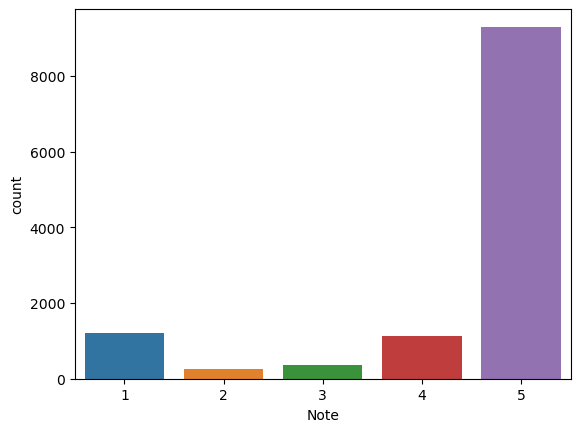

In [3]:
import pandas as pd

df = pd.read_csv("Df_avis.csv")
# visulisations

df['Note'] = df['Note'].astype(int)
display(df.Note.value_counts())
import seaborn as sns

sns.countplot(x=df['Note'])

display(df.info())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Florian\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
# Définir nauge des mots pour entrepise 1


from nltk.corpus import stopwords 

# Initialiser la variable des mots vides en français
Stop_words = set(stopwords.words('french'))

# Ajouter à la liste des stopwords des éléments de syntaxe qui ne servent pas à l'analyse du texte
new_stop_words = ["m'a","j'ai","a",",", ".", "``", "@", "*", "(", ")", "...", "!", "?", "-", "_", ">", "<", ":", "/", "=", "--", "©", "~", ";", "\\", "\\\\"]
Stop_words.update(new_stop_words)
print(Stop_words)

# Définir la fonction stop_words_filtering
def Stop_words_filtering(text):
    words = text.split()  # Sépare la chaîne de caractères en mots
    # Création d'une nouvelle liste contenant les mots filtrés
    filtered_list = [mot for mot in words if mot not in Stop_words]
    return ' '.join(filtered_list)  # Rejoindre les mots filtrés en une seule chaîne de texte


# Appliquer la fonction de filtrage sur la colonne 'Contenu_avis'
df['Contenu_avis'] = df['Contenu_avis'].apply(Stop_words_filtering)

# Afficher le DataFrame après filtrage
print(df.head())



{'ce', 'j', 'ses', 'qui', 'lui', 'étions', 'm', 'te', 'ayant', '-', 'étant', 'un', 'serai', 'étés', 'nos', 'ton', 'fussent', 'mais', ':', 'étante', 'soit', 'aie', '\\', 'par', 'étiez', 'fut', 'serais', 'auras', 'même', 'eue', 'de', 'vos', 'aviez', 'eûmes', 'eûtes', 'ayante', 'furent', 'aux', 'sommes', 't', '=', 'aurai', 'ont', 'auront', 'me', 'eurent', 'je', 'fût', '?', 'fusse', 'êtes', '*', 'eusse', 'se', 'soyez', 'l', 'y', 'seront', 'aura', 'avions', 'serait', 'soient', 'eusses', 'fus', 'en', 'fussiez', 'auriez', '>', 'seras', '_', 'on', 'ta', 'aurait', 'étais', 'que', '(', '!', 'sur', 'fûmes', 'suis', '--', 's', '©', 'moi', 'ils', 'avais', 'aurons', 'fussions', 'le', ')', 'eût', 'notre', '``', 'avait', 'aurez', 'mon', 'seriez', 'ai', 'vous', 'son', 'fusses', 'es', 'étée', 'au', 'c', 'tes', 'seraient', 'une', 'd', 'étaient', 'serons', '\\\\', 'qu', 'eussions', 'eussent', 'ayantes', "j'ai", 'ayants', 'aies', "m'a", '.', 'dans', 'pour', 'pas', 'eussiez', 'avec', 'eus', 'est', 'avaient'

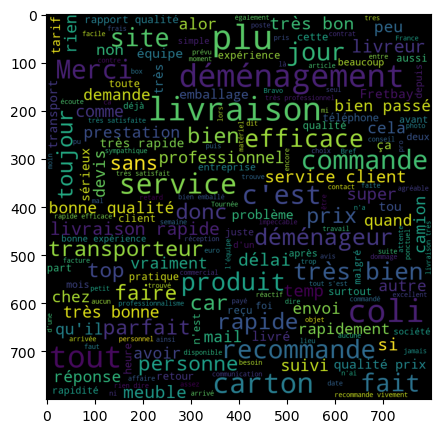

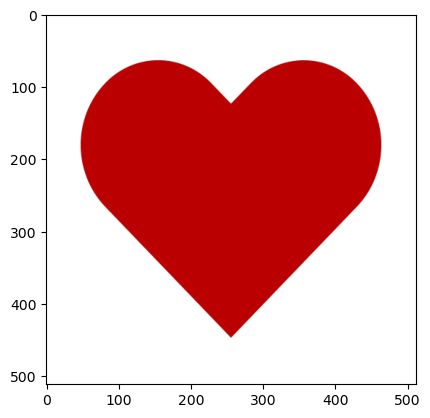

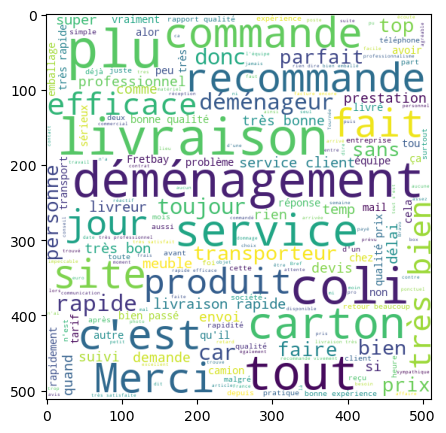

In [28]:

from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Définir la variable text
text = ""
for comment in df['Contenu_avis'] : 
    text += comment

def plot_word_cloud(text, masque, background_color = "black") :
    # Définir un masque
    mask_coloring = np.array(Image.open(str(masque)))

    # Définir le calque du nuage des mots
    wc = WordCloud(width=800, height=400, background_color=background_color, max_words=200, stopwords=Stop_words, mask = mask_coloring, max_font_size=70, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (10,5))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()


# Code d'affichage du masque
import matplotlib.image as mpimg
img = mpimg.imread("coeur.png")
plt.imshow(img)
plt.show()

plot_word_cloud(text, "coeur.png", "white")

# Création d'un histogramme¶




In [29]:
from collections import Counter
import seaborn as sns 

#wc.generate(text)  # "Calcul" du wordcloud

# Récupération des mots et de leurs fréquences relatives 
#mots_filtres = wc.words_

"""
# Affichage des mots et de leurs fréquences
print("Mots filtrés et leurs fréquences relatives:")
for mot, frequence in mots_filtres.items():
    print(f"{mot}: {frequence}")
"""

# Convertir les fréquences relatives en fréquences absolues si nécessaire
# Ici, nous sélectionnons simplement les 15 mots les plus fréquents
mots = list(mots_filtres.keys())[:25]
frequences = list(mots_filtres.values())[:25]

plt.figure(figsize=(10, 6))
sns.barplot(x=frequences, y=mots)
plt.title(' mots les plus fréquemment employés')
plt.xlabel('Fréquence relative')
plt.ylabel('Mots')
plt.show()


NameError: name 'wc' is not defined

### Indicateurs par note

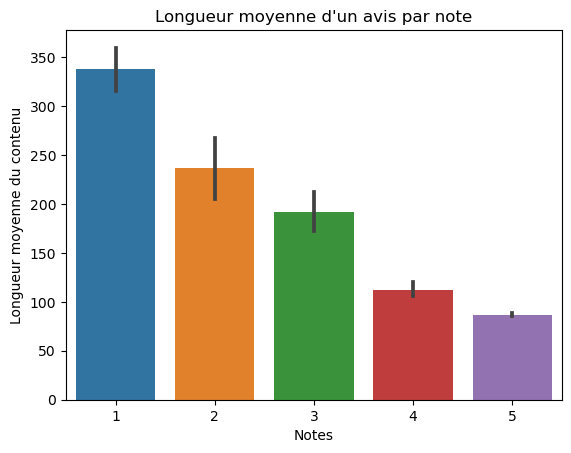

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualisation de la longueur par note
length = df["Contenu_avis"].apply(len)
sns.barplot(x = df["Note"], y = length, data=df)
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne du contenu")
plt.title("Longueur moyenne d'un avis par note")
plt.show();

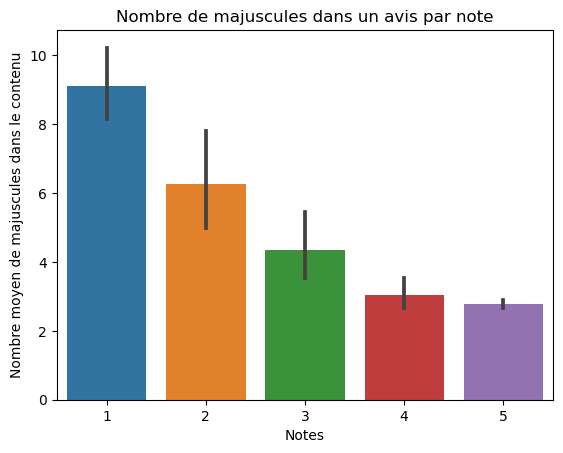

In [26]:
# Visualisation des majuscules par note
nb_maj = df["Contenu_avis"].apply(lambda x: sum(1 for c in x if c.isupper())) # Création d'une Series avec le nombre de majuscules

sns.barplot(x = df["Note"], y = nb_maj, data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de majuscules dans le contenu")
plt.title("Nombre de majuscules dans un avis par note")
plt.show();

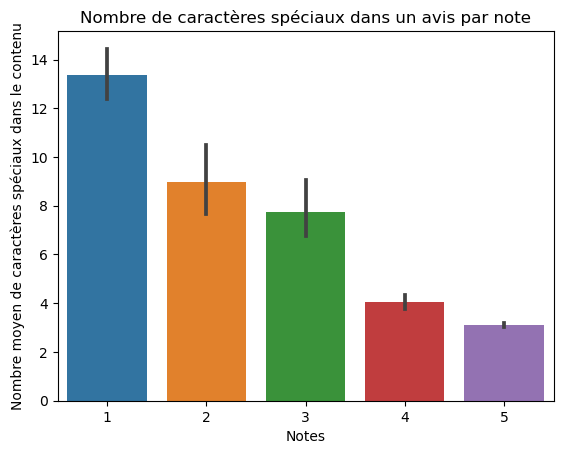

In [27]:
def count_special_chars(s):
    special_chars = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~" #Liste de tous les caractères spéciaux
    return sum(1 for c in s if c in special_chars)

sns.barplot(x = df["Note"], y = df["Contenu_avis"].apply(count_special_chars), data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de caractères spéciaux dans le contenu")
plt.title("Nombre de caractères spéciaux dans un avis par note")
plt.show();

c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and 

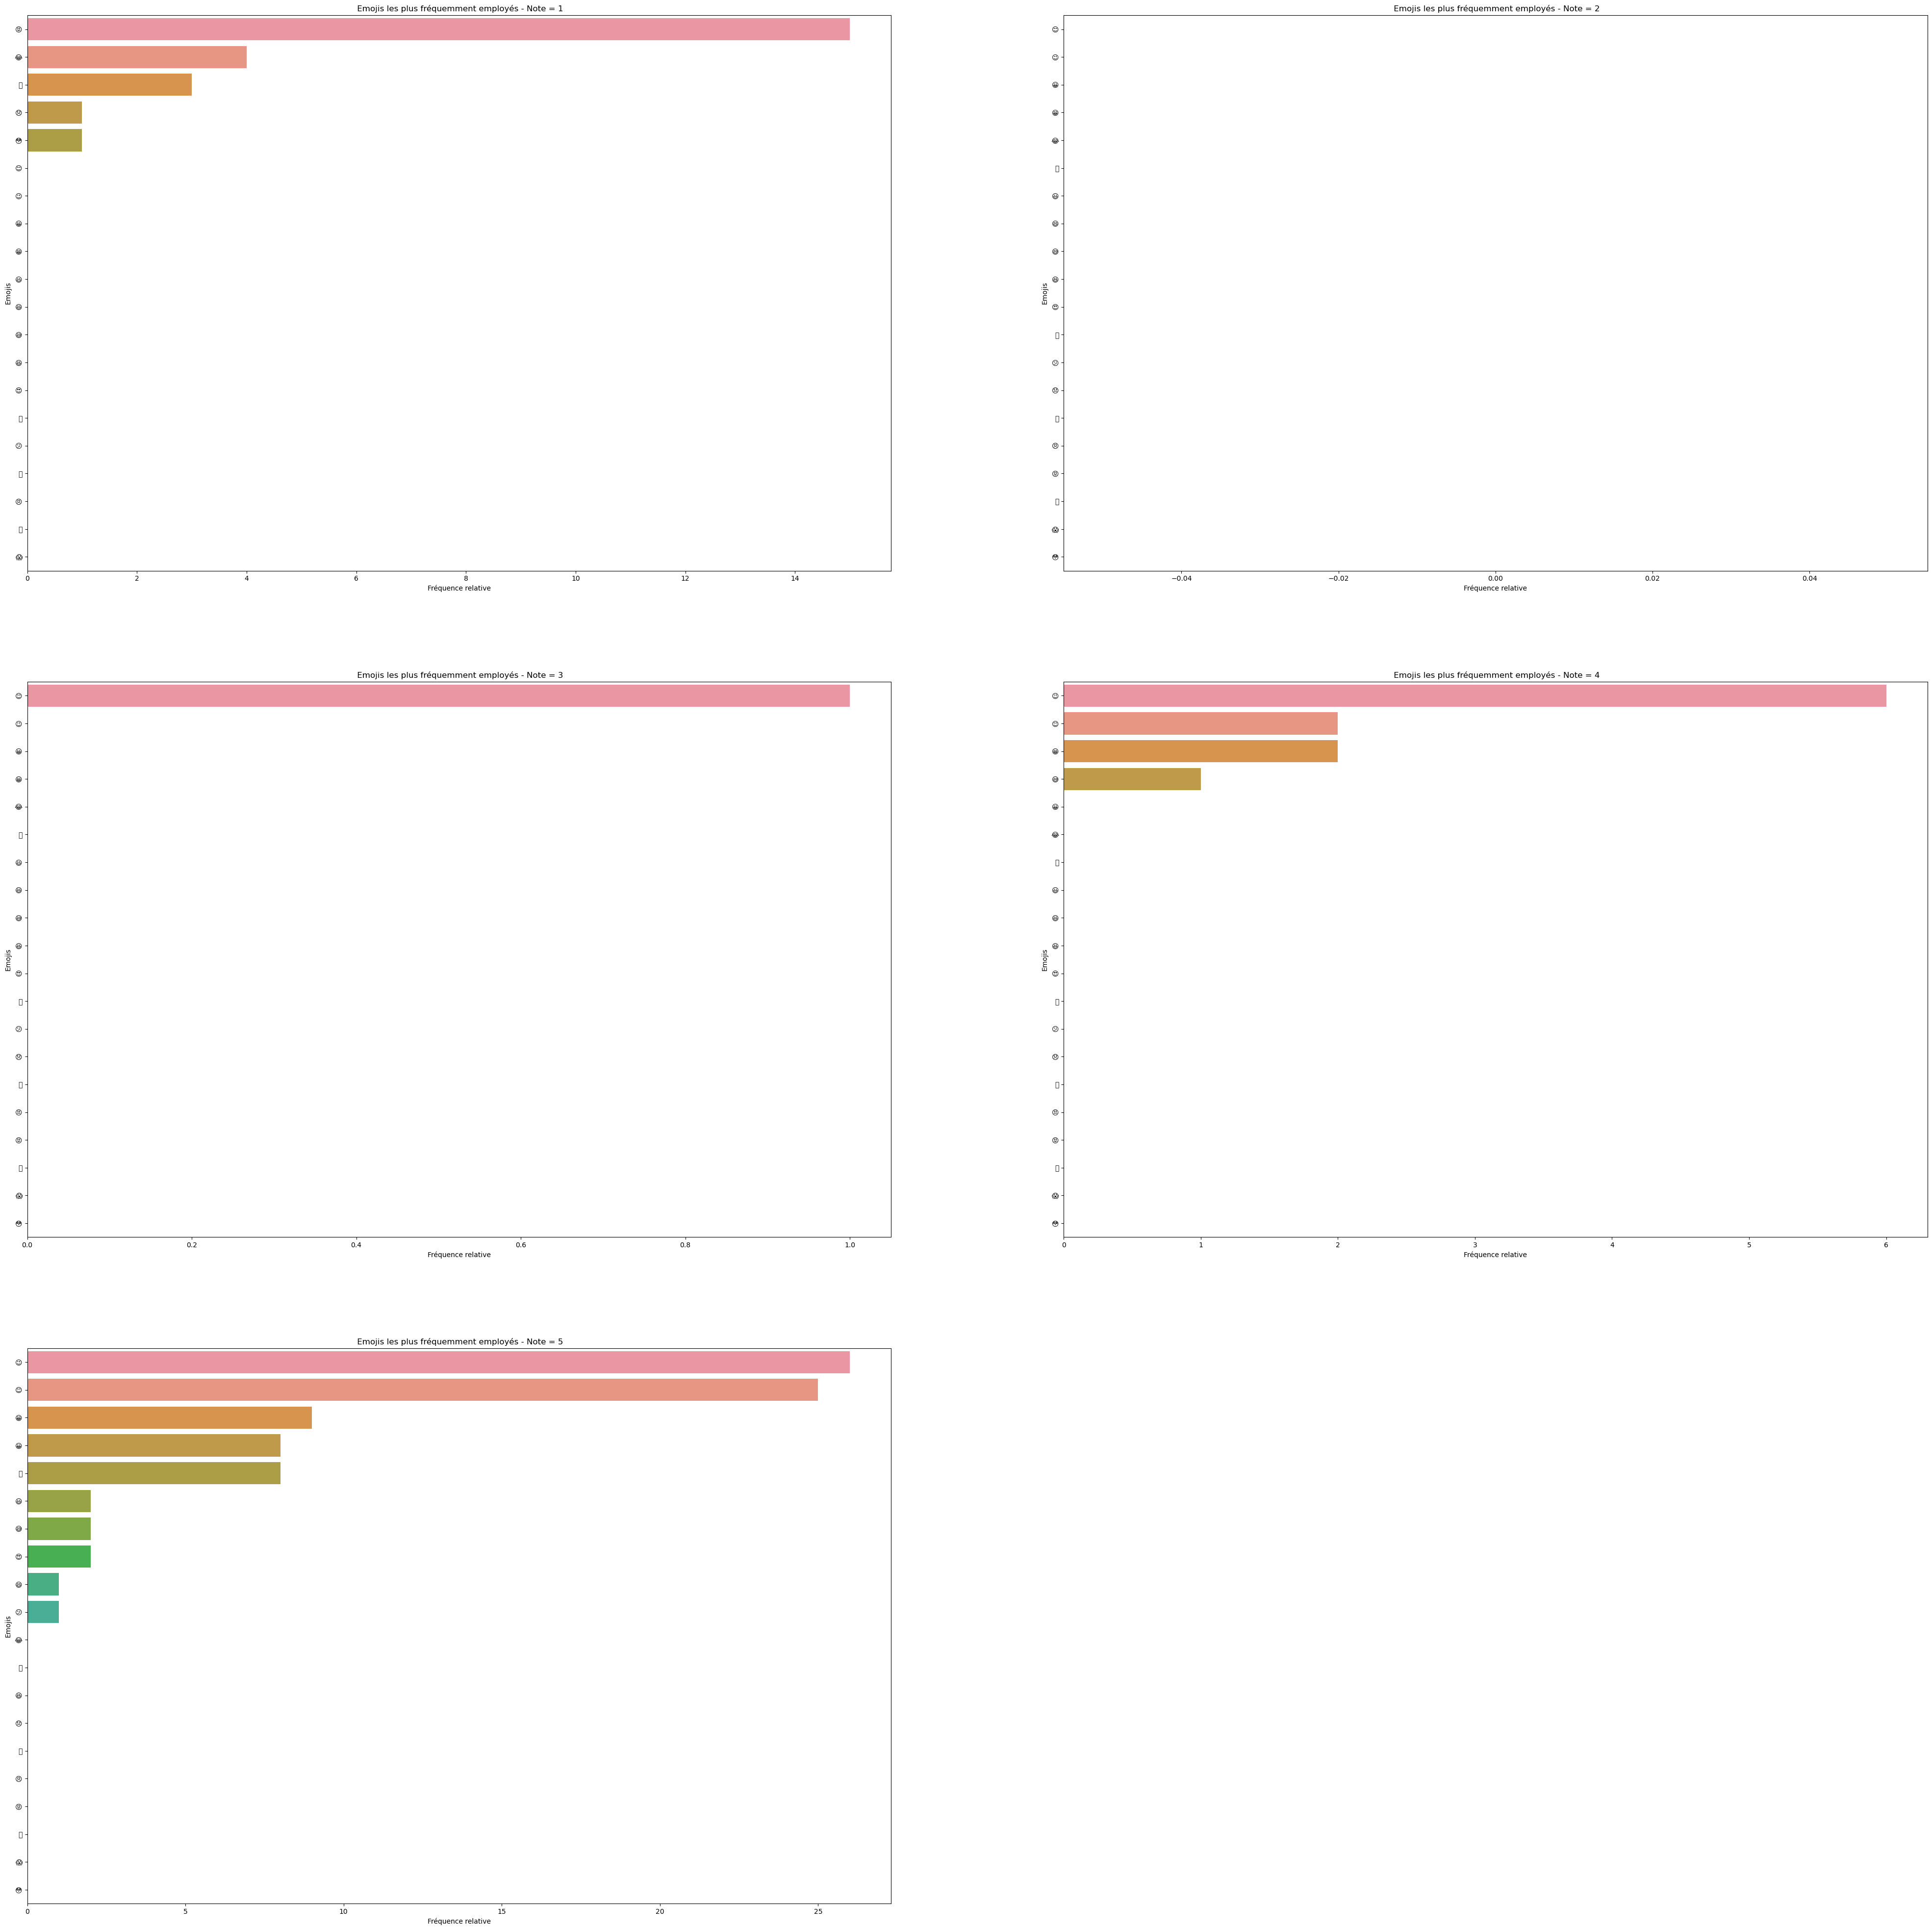

In [83]:
# Fonction compteur emojis
def count_emojis(col):
    # Création d'une liste d'émojis
    emo = ["😊","😉", "😀", "😁", "😂", "🤣", "😃", "😄", "😅", "😆", "😍", "🙂", "😕", "😞", "🙁", "😠", "😡", "😬", "😱", "😳"]
    freq_emoji = []

    for e in emo:
        som = 0
        for s in col:
            som += sum(1 for c in s if c == e)
        freq_emoji.append(som)
    
    # Tri des émojis et de leurs fréquences en fonction de la fréquence
    emo_freq_sorted = sorted(zip(emo, freq_emoji), key=lambda x: x[1], reverse=True)
    emo_sorted, freq_sorted = zip(*emo_freq_sorted)

    return (list(emo_sorted), list(freq_sorted))

plt.figure(figsize=(50, 50))
plt.subplot(321)
list_emo_1, freq_emo_1 = count_emojis(df.loc[df["Note"]==1 ,"Contenu_avis"])


sns.barplot(x=freq_emo_1, y=list_emo_1)
plt.title(' Emojis les plus fréquemment employés - Note = 1')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(322)
list_emo_2, freq_emo_2 = count_emojis(df.loc[df["Note"]==2 ,"Contenu_avis"])

sns.barplot(x=freq_emo_2, y=list_emo_2)
plt.title(' Emojis les plus fréquemment employés - Note = 2')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(323)
list_emo_3, freq_emo_3 = count_emojis(df.loc[df["Note"]==3 ,"Contenu_avis"])

sns.barplot(x=freq_emo_3, y=list_emo_3)
plt.title(' Emojis les plus fréquemment employés - Note = 3')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(324)
list_emo_4, freq_emo_4 = count_emojis(df.loc[df["Note"]==4 ,"Contenu_avis"])

sns.barplot(x=freq_emo_4, y=list_emo_4)
plt.title(' Emojis les plus fréquemment employés - Note = 4')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(325)
list_emo_5, freq_emo_5 = count_emojis(df.loc[df["Note"]==5 ,"Contenu_avis"])

sns.barplot(x=freq_emo_5, y=list_emo_5)
plt.title(' Emojis les plus fréquemment employés - Note = 5')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.show();

### Indicateurs par titre

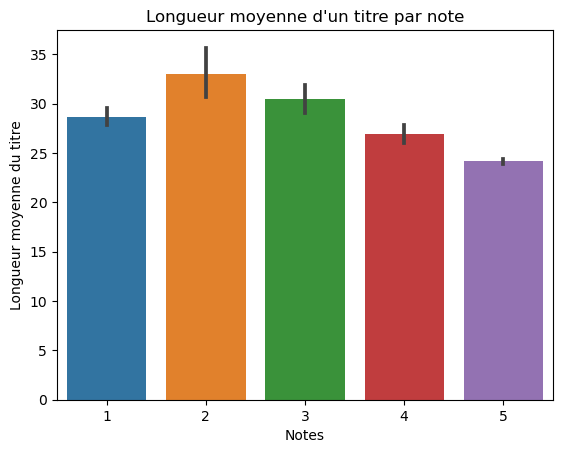

In [28]:
#Visualisation de la longueur du titre par note
length = df["Titre_avis"].apply(len)
sns.barplot(x = df["Note"], y = length, data=df)
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne du titre")
plt.title("Longueur moyenne d'un titre par note")
plt.show();

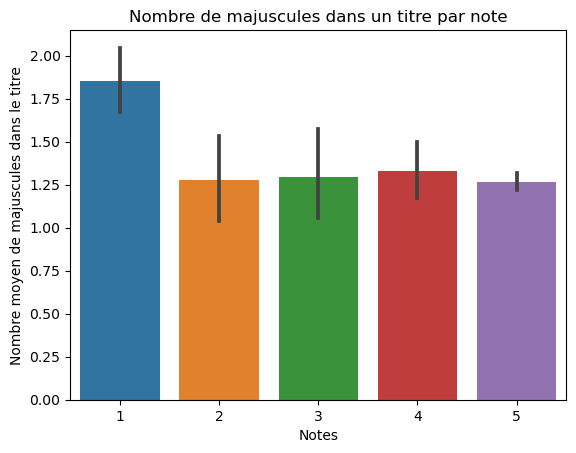

In [29]:
# Visualisation des majuscules d'un titre par note
nb_maj = df["Titre_avis"].apply(lambda x: sum(1 for c in x if c.isupper())) # Création d'une Series avec le nombre de majuscules

sns.barplot(x = df["Note"], y = nb_maj, data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de majuscules dans le titre")
plt.title("Nombre de majuscules dans un titre par note")
plt.show();

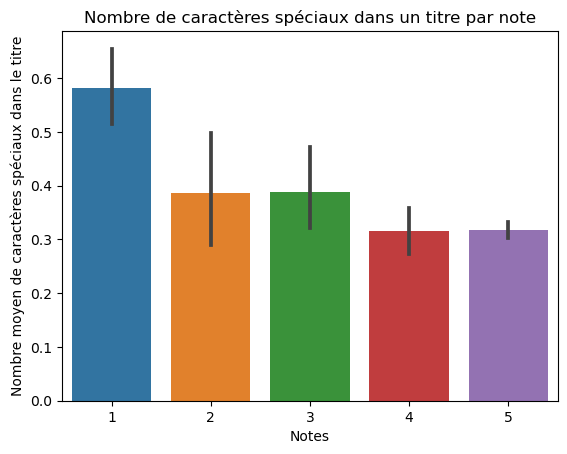

In [31]:
sns.barplot(x = df["Note"], y = df["Titre_avis"].apply(count_special_chars), data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de caractères spéciaux dans le titre")
plt.title("Nombre de caractères spéciaux dans un titre par note")
plt.show();

c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and 

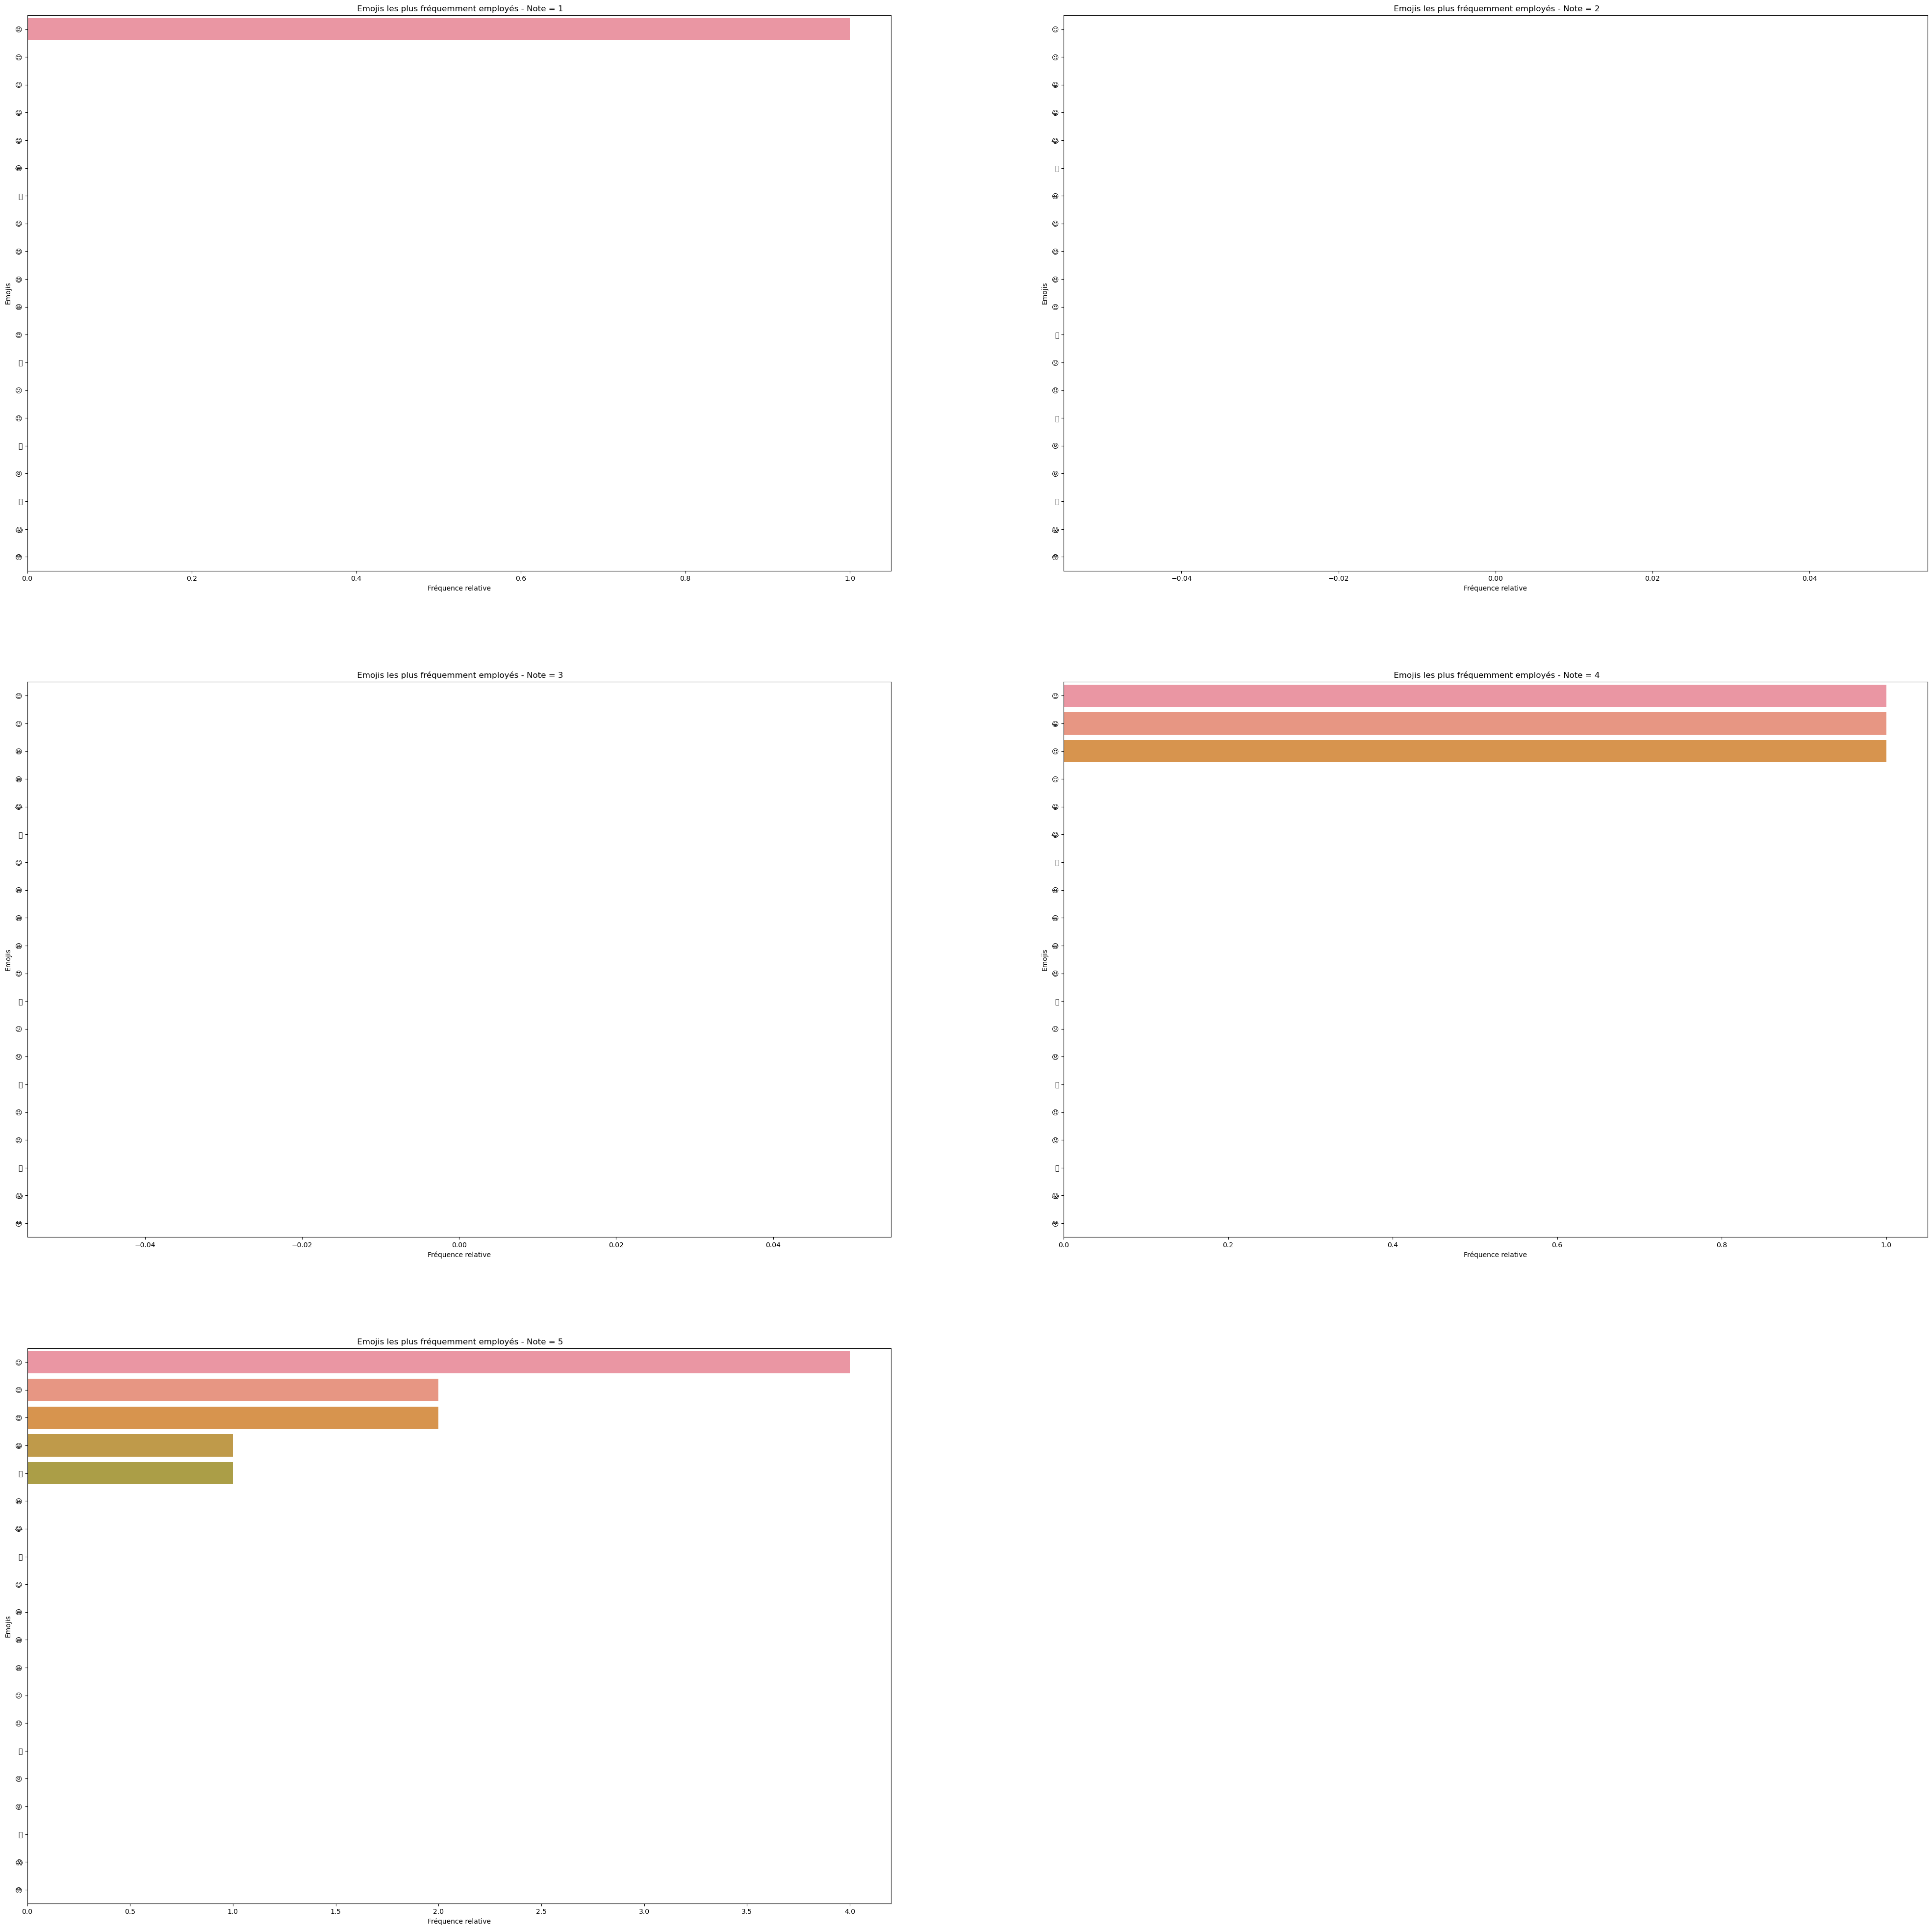

In [82]:
# Fonction compteur emojis
def count_emojis(col):
    # Création d'une liste d'émojis
    emo = ["😊","😉", "😀", "😁", "😂", "🤣", "😃", "😄", "😅", "😆", "😍", "🙂", "😕", "😞", "🙁", "😠", "😡", "😬", "😱", "😳"]
    freq_emoji = []

    for e in emo:
        som = 0
        for s in col:
            som += sum(1 for c in s if c == e)
        freq_emoji.append(som)
    
    # Tri des émojis et de leurs fréquences en fonction de la fréquence
    emo_freq_sorted = sorted(zip(emo, freq_emoji), key=lambda x: x[1], reverse=True)
    emo_sorted, freq_sorted = zip(*emo_freq_sorted)

    return (list(emo_sorted), list(freq_sorted))

plt.figure(figsize=(50, 50))
plt.subplot(321)
list_emo_1, freq_emo_1 = count_emojis(df.loc[df["Note"]==1 ,"Titre_avis"])


sns.barplot(x=freq_emo_1, y=list_emo_1)
plt.title(' Emojis les plus fréquemment employés - Note = 1')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(322)
list_emo_2, freq_emo_2 = count_emojis(df.loc[df["Note"]==2 ,"Titre_avis"])

sns.barplot(x=freq_emo_2, y=list_emo_2)
plt.title(' Emojis les plus fréquemment employés - Note = 2')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(323)
list_emo_3, freq_emo_3 = count_emojis(df.loc[df["Note"]==3 ,"Titre_avis"])

sns.barplot(x=freq_emo_3, y=list_emo_3)
plt.title(' Emojis les plus fréquemment employés - Note = 3')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(324)
list_emo_4, freq_emo_4 = count_emojis(df.loc[df["Note"]==4 ,"Titre_avis"])

sns.barplot(x=freq_emo_4, y=list_emo_4)
plt.title(' Emojis les plus fréquemment employés - Note = 4')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(325)
list_emo_5, freq_emo_5 = count_emojis(df.loc[df["Note"]==5 ,"Titre_avis"])

sns.barplot(x=freq_emo_5, y=list_emo_5)
plt.title(' Emojis les plus fréquemment employés - Note = 5')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.show();

### Indicateurs par réponse

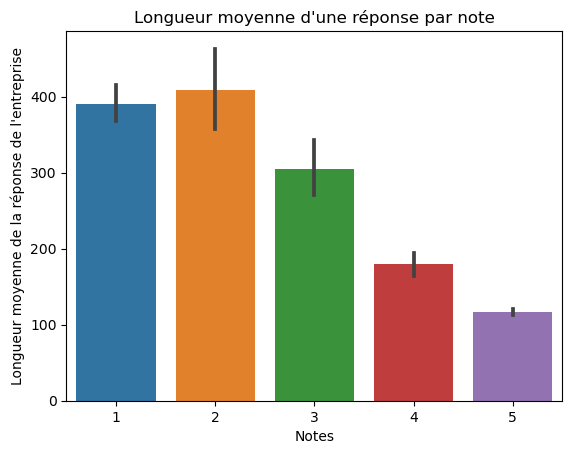

In [32]:
#Visualisation de la longueur de la réponse par note
length = df["Réponse_Entrpris"].apply(len)
sns.barplot(x = df["Note"], y = length, data=df)
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne de la réponse de l'entreprise")
plt.title("Longueur moyenne d'une réponse par note")
plt.show();

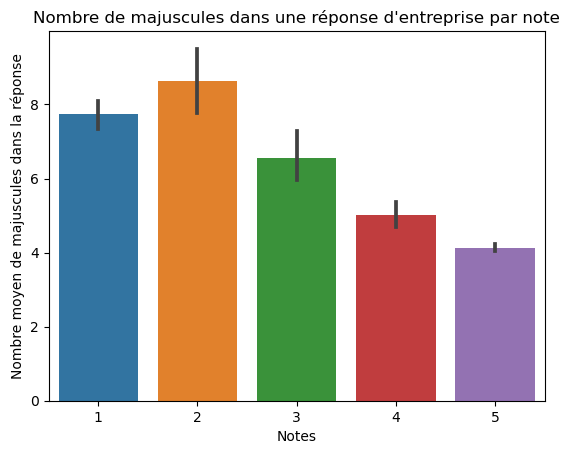

In [33]:
# Visualisation des majuscules d'une réponse par note
nb_maj = df["Réponse_Entrpris"].apply(lambda x: sum(1 for c in x if c.isupper())) # Création d'une Series avec le nombre de majuscules

sns.barplot(x = df["Note"], y = nb_maj, data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de majuscules dans la réponse")
plt.title("Nombre de majuscules dans une réponse d'entreprise par note")
plt.show();

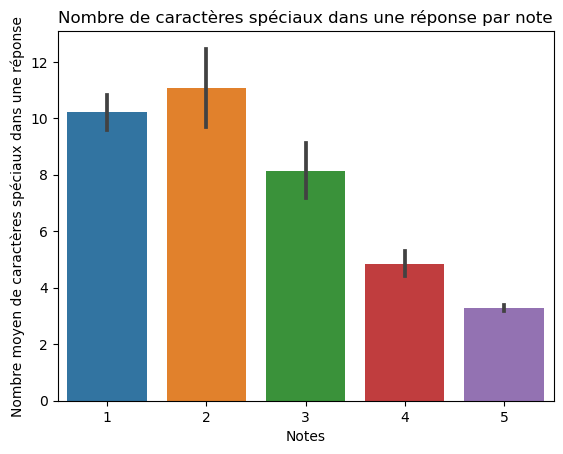

In [34]:
sns.barplot(x = df["Note"], y = df["Réponse_Entrpris"].apply(count_special_chars), data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de caractères spéciaux dans une réponse")
plt.title("Nombre de caractères spéciaux dans une réponse par note")
plt.show();

c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and 

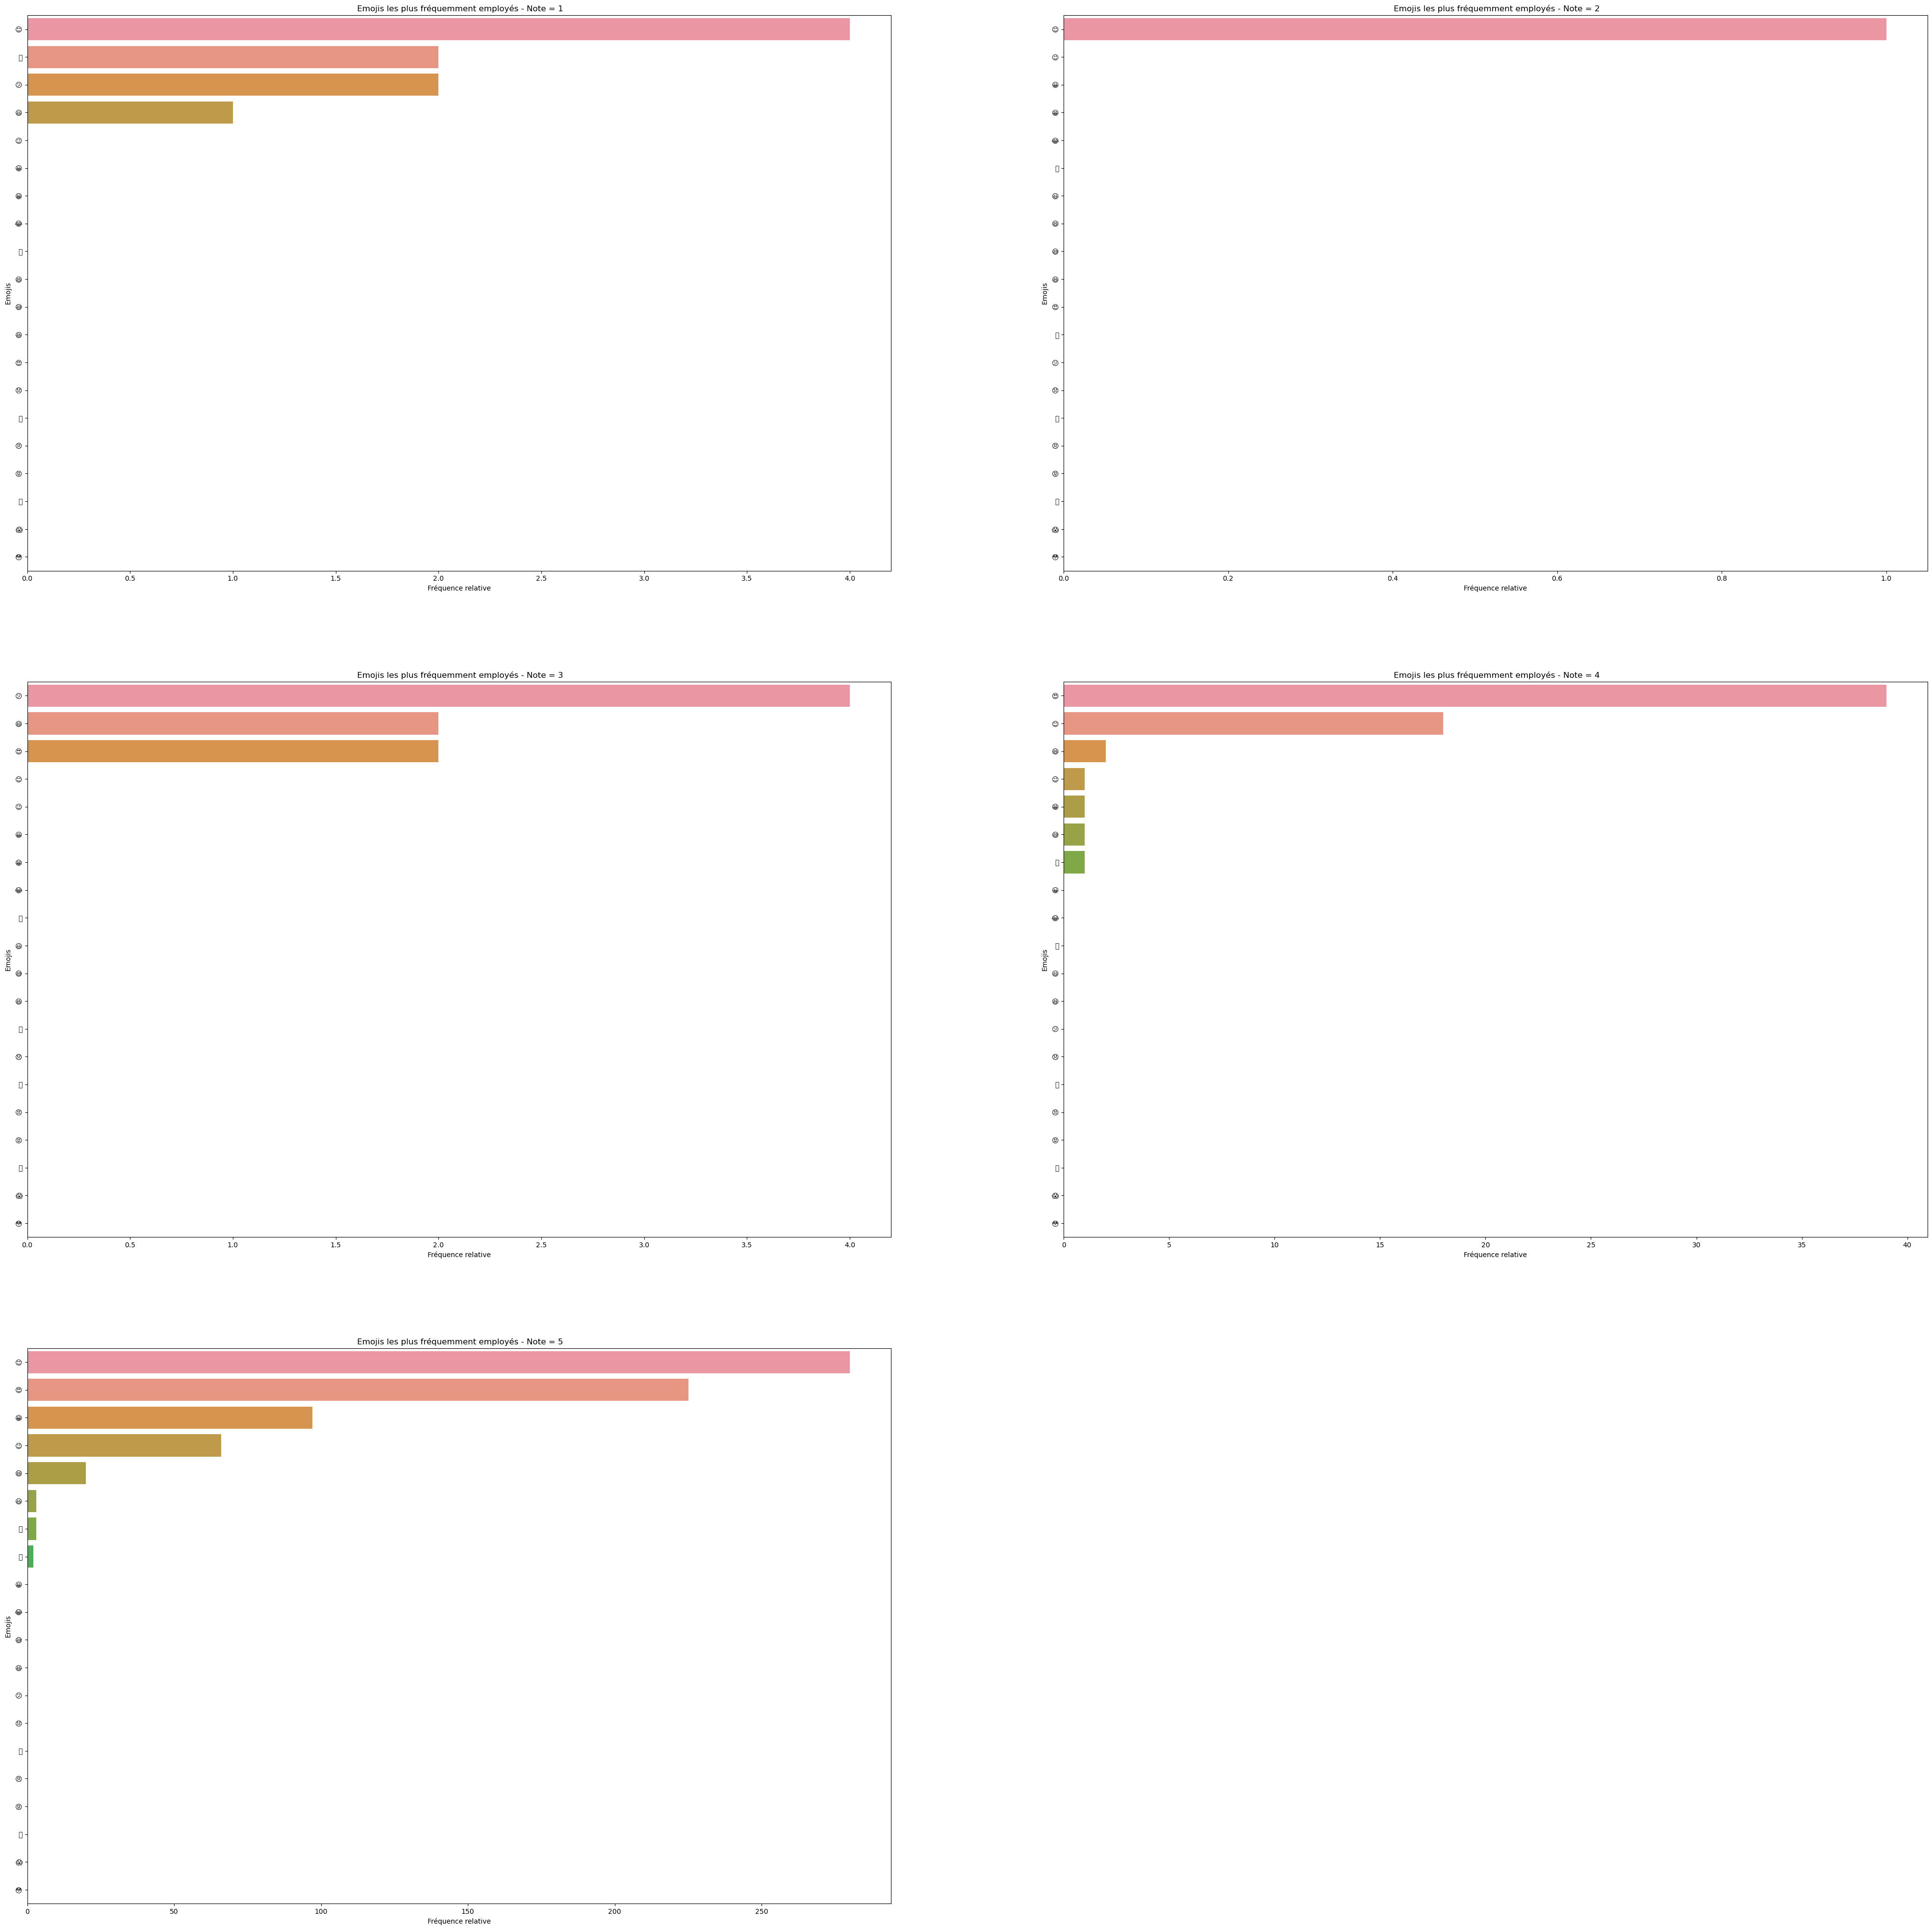

In [81]:
# Fonction compteur emojis
def count_emojis(col):
    # Création d'une liste d'émojis
    emo = ["😊","😉", "😀", "😁", "😂", "🤣", "😃", "😄", "😅", "😆", "😍", "🙂", "😕", "😞", "🙁", "😠", "😡", "😬", "😱", "😳"]
    freq_emoji = []

    for e in emo:
        som = 0
        for s in col:
            som += sum(1 for c in s if c == e)
        freq_emoji.append(som)
    
    # Tri des émojis et de leurs fréquences en fonction de la fréquence
    emo_freq_sorted = sorted(zip(emo, freq_emoji), key=lambda x: x[1], reverse=True)
    emo_sorted, freq_sorted = zip(*emo_freq_sorted)

    return (list(emo_sorted), list(freq_sorted))

plt.figure(figsize=(50, 50))
plt.subplot(321)
list_emo_1, freq_emo_1 = count_emojis(df.loc[df["Note"]==1 ,"Réponse_Entrpris"])


sns.barplot(x=freq_emo_1, y=list_emo_1)
plt.title(' Emojis les plus fréquemment employés - Note = 1')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(322)
list_emo_2, freq_emo_2 = count_emojis(df.loc[df["Note"]==2 ,"Réponse_Entrpris"])

sns.barplot(x=freq_emo_2, y=list_emo_2)
plt.title(' Emojis les plus fréquemment employés - Note = 2')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(323)
list_emo_3, freq_emo_3 = count_emojis(df.loc[df["Note"]==3 ,"Réponse_Entrpris"])

sns.barplot(x=freq_emo_3, y=list_emo_3)
plt.title(' Emojis les plus fréquemment employés - Note = 3')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(324)
list_emo_4, freq_emo_4 = count_emojis(df.loc[df["Note"]==4 ,"Réponse_Entrpris"])

sns.barplot(x=freq_emo_4, y=list_emo_4)
plt.title(' Emojis les plus fréquemment employés - Note = 4')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(325)
list_emo_5, freq_emo_5 = count_emojis(df.loc[df["Note"]==5 ,"Réponse_Entrpris"])

sns.barplot(x=freq_emo_5, y=list_emo_5)
plt.title(' Emojis les plus fréquemment employés - Note = 5')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.show();